<a href="https://colab.research.google.com/github/u2200579/Object-Recognition/blob/main/DM_(Object_Recognition).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/My Drive/Xtrain.csv" "train"
!cp "/content/drive/My Drive/Ytrain.csv" "y_train"
!cp "/content/drive/My Drive/Xtest.csv" "test"

In [ ]:
#Q1 i)
# there are 3,000 x training examples
x = np.loadtxt('Xtrain.csv')
print(x.shape)
y = np.loadtxt('Ytrain.csv')
print(y.shape)
#there are 3,000 test examples
xt = np.loadtxt('Xtest.csv')
print(xt.shape)
# in total there are 6,000 examples
print(y)

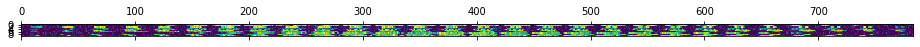

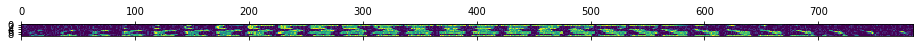

In [ ]:
plt.matshow(x[:10])
plt.matshow(xt[:10])
plt.show()

In [ ]:
#sum all indexes in y training data that are 1
np.sum(np.array(y) >= 0, axis=0)
#There are 1824 positive (+1) examples 60.8%
#There are 1176 negative (-1) examples 39.2%

1824

In [ ]:
#using a dummy classifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score, make_scorer
dummy_clf = DummyClassifier()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
#fit model to our training data
dummy_clf.fit(x_train, y_train)
#to calculate accuracy score input actual y labels along with models predicted y label
Accuracy = accuracy_score(y_test, dummy_clf.predict(x_test))
#to calculate accuracy score input actual y labels along with probability of model predicting y label
pr_auc = average_precision_score(y_test, dummy_clf.predict_proba(x_test)[:,1])
#to calculate accuracy score input actual y labels along with probability of model predicting y label
roc_auc = roc_auc_score(y_test, dummy_clf.predict_proba(x_test)[:,1])
#print scores
print('Accuracy:', Accuracy,'AUC-PR:', pr_auc,'AUC-ROC:', roc_auc)

Accuracy: 0.5222222222222223 AUC-PR: 0.5849086397473494 AUC-ROC: 0.5017094017094017


/opt/anaconda3/lib/python3.7/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [ ]:
#Question 2
#i) 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
B = []
C = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x, y)):
    xtr, xv = x[tr_idx],  x[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    clf = KNeighborsClassifier(n_neighbors=1)
    #fit model in the training sets
    clf.fit(xtr, ytr)
    #calculate the accuacy, ROC, PR of the validation sets for each fold
    Accuracy = accuracy_score(yv, clf.predict(xv))
    roc_auc = roc_auc_score(yv, clf.predict_proba(xv)[:,1])
    pr_auc = average_precision_score(yv, clf.predict_proba(xv)[:,1])
    #output the metrics of each fold
    print('Fold', i,'Accuracy:', Accuracy,'AUC-PR:', pr_auc, 'AUC-ROC:', roc_auc)
    #append the accuracy, ROC and PR scores from each fold into seperate lists
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)    
# ii) using lists calculate mean and standard deviation of metrics across the folds
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))

Fold 0 Accuracy: 0.8316666666666667 AUC-PR: 0.8370093123591666 AUC-ROC: 0.8314630284969269
Fold 1 Accuracy: 0.8333333333333334 AUC-PR: 0.8376330056715751 AUC-ROC: 0.8319440396385893
Fold 2 Accuracy: 0.8183333333333334 AUC-PR: 0.818942845415833 AUC-ROC: 0.8127951034683766
Fold 3 Accuracy: 0.8133333333333334 AUC-PR: 0.8139019991558266 AUC-ROC: 0.8071699213057417
Fold 4 Accuracy: 0.8233333333333334 AUC-PR: 0.8240369155572705 AUC-ROC: 0.8184202856310114
AVG_ACC: 0.8240000000000001 AVG_PR: 0.8263048156319345 AVG_ROC: 0.8203584757081291
STD_ACC: 0.007644896627453143 STD_PR: 0.009550769314657072 STD_ROC: 0.00992406702781481


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
skf = StratifiedKFold(n_splits=5,shuffle = True)
A = []
B = []
C = []
#applying different forms of preprocessing to training data
SS = StandardScaler().fit(x)
x1 = SS.transform(x)
MMS = MinMaxScaler().fit(x)
x2 = MMS.transform(x)
N = Normalizer().fit(x)
x3 = N.transform(x)
R = RobustScaler().fit(x)
x4 = R.transform(x)
#performing 5 fold-stratified cross validation from lecture 4.9 and applying it to the preprocessor that most improved KNN scores
for i,(tr_idx, v_idx) in enumerate(skf.split(x3, y)):
    x3tr, x3v = x3[tr_idx],  x3[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    #assigning clf variable to KNN clasifier of n=1
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(x3tr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(x3v))
    roc_auc = roc_auc_score(yv, clf.predict_proba(x3v)[:,1])
    pr_auc = average_precision_score(yv, clf.predict_proba(x3v)[:,1])
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
#   print('Fold', i,'Accuracy:', Accuracy,'AUC-PR:', pr_auc, 'AUC-ROC:', roc_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))

AVG_ACC: 0.8496666666666666 AVG_PR: 0.8380456111414795 AVG_ROC: 0.8384442381344506
STD_ACC: 0.006944222218666522 STD_PR: 0.010908546273880713 STD_ROC: 0.01070879682649877


In [ ]:
roc_auc = make_scorer(roc_auc_score, greater_is_better=True,needs_threshold=True)
knn = KNeighborsClassifier()
#created a list of K nearest neighbours from 1 to 21
krange = list(range(1,22))
param = dict(n_neighbors=krange)
#setting score to be roc to see which parameters is most accurate at predicting labels
#Also when Gridsearch is applied with a classifier and a y that is binary - which is the case - stratified k fold is used in the model
grid = GridSearchCV(knn, param, cv=5,scoring='roc_auc')
grid.fit(x,y)
df51 = pd.DataFrame(grid.cv_results_)
#outputs the best parameters of model according to gridsearch
print(grid.best_params_)
df51

{'n_neighbors': 6}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.107284,0.038512,2.532719,0.478138,1,{'n_neighbors': 1},0.795167,0.821918,0.826669,0.828738,0.826465,0.819791,0.012512,21
1,0.239612,0.094526,3.913859,1.267043,2,{'n_neighbors': 2},0.859587,0.859796,0.850866,0.881271,0.876969,0.865698,0.011504,20
2,0.150096,0.100516,2.669522,0.378133,3,{'n_neighbors': 3},0.884243,0.873489,0.880414,0.891361,0.896701,0.885241,0.008139,19
3,0.131171,0.065708,2.570135,0.281976,4,{'n_neighbors': 4},0.895837,0.885683,0.891565,0.911618,0.910638,0.899068,0.010366,18
4,0.168064,0.092474,2.787843,0.570305,5,{'n_neighbors': 5},0.907228,0.892620,0.898420,0.918076,0.917394,0.906748,0.010108,4
5,0.095264,0.010679,2.384871,0.200855,6,{'n_neighbors': 6},0.904981,0.903707,0.898414,0.915430,0.915156,0.907538,0.006705,1
6,0.129881,0.065452,2.804922,0.095342,7,{'n_neighbors': 7},0.904853,0.897989,0.900111,0.913244,0.917342,0.906708,0.007467,6
7,0.095975,0.014358,2.460447,0.406112,8,{'n_neighbors': 8},0.908590,0.897150,0.899749,0.911513,0.915238,0.906448,0.006911,8
8,0.094285,0.006686,2.277736,0.206408,9,{'n_neighbors': 9},0.908014,0.899236,0.900286,0.911740,0.913500,0.906555,0.005833,7
9,0.125895,0.061097,2.450499,0.391550,10,{'n_neighbors': 10},0.906477,0.899796,0.902221,0.910755,0.910755,0.906001,0.004432,9


In [ ]:
#The Optimal value for K using gridsearch with scoring set to roc_auc as it is better to analyse the models 
#abillity to predict correct classes is 6 with a cross validation accuracy of roughly 0.82, ROC of 0.90, PR of 0.91
A = []
B = []
C = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x, y)):
    xtr, xv = x[tr_idx],  x[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    clf = KNeighborsClassifier(n_neighbors=6)
    clf.fit(xtr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(xv))
    roc_auc = roc_auc_score(yv, clf.predict_proba(xv)[:,1])
    pr_auc = average_precision_score(yv, clf.predict_proba(xv)[:,1])
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
    # print('Fold', i,'Accuracy:', Accuracy,'AUC-PR:', pr_auc, 'AUC-ROC:', roc_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))

AVG_ACC: 0.8153333333333335 AVG_PR: 0.9130824537689606 AVG_ROC: 0.9039668528197569
STD_ACC: 0.026021358748364996 STD_PR: 0.012776830595006089 STD_ROC: 0.013355409995426892


In [ ]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
roc_auc = make_scorer(roc_auc_score, greater_is_better=True,needs_threshold=True)
#SVM classifier Gridsearch for best parameters using preprocessed training data
clf1 = GridSearchCV(SVC(max_iter=100), {'C' : [0.1, 1, 10, 100], 'kernel' : ['poly','sigmoid','linear','rbf'], 'gamma' : [1, 0.1, 0.01]},scoring='roc_auc', cv=5)
clf1.fit(x4,y)
#append results into dataframe
df1 = pd.DataFrame(clf1.cv_results_)


In [ ]:
#Logistic Regression classifier Gridsearch using preprocessed training data
clf2 = GridSearchCV(LogisticRegression(max_iter=100), {'solver':['sag', 'saga'], 'C' : [1, 10, 100],  'penalty' : ['l2','l1','elasticnet','none']},scoring='roc_auc', cv=5)
clf2.fit(x3,y)
df2 = pd.DataFrame(clf2.cv_results_)


In [ ]:
#Perceptron classifier Gridsearch using preprocessed training data
clf3 = GridSearchCV(GaussianNB(), {'var_smoothing': [1e-11, 1e-10, 1e-9]},scoring='roc_auc', cv=5)
clf3.fit(x3,y)
df3 = pd.DataFrame(clf3.cv_results_)

In [ ]:
#Perceptron classifier Gridsearch using preprocessed training data
clf4 = GridSearchCV(Perceptron(), {'penalty' : ['l2','l1','elasticnet']},scoring='roc_auc', cv=5)
clf4.fit(x2,y)
df4 = pd.DataFrame(clf4.cv_results_)

In [ ]:
#Nearest Neighbour classifier Gridsearch using preprocessed training data
clf5 = GridSearchCV(knn, param,scoring='roc_auc', cv=5)
clf5.fit(x3,y)
df5 = pd.DataFrame(clf5.cv_results_)

In [ ]:
#output the best parameters of each model
print('SVM:',clf1.best_params_)
print('LR:',clf2.best_params_)
print('GNB:',clf3.best_params_)
print('P:',clf4.best_params_)
print('NN:',clf5.best_params_)

SVM: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
LR: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
GNB: {'var_smoothing': 1e-11}
P: {'penalty': 'l1'}
NN: {'n_neighbors': 8}


In [ ]:
#Table of GridSearch results for each model
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    display(df)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,param_penalty,param_solver,param_var_smoothing,param_n_neighbors
0,0.475788,0.011574,0.105974,0.004528,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",0.595979,0.609595,0.610318,0.628528,0.618432,0.612570,0.010754,13,NaN,NaN,NaN,NaN
1,0.494482,0.004926,0.106142,0.005594,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",0.354739,0.418566,0.374678,0.397890,0.336042,0.376383,0.029464,41,NaN,NaN,NaN,NaN
2,0.453100,0.011501,0.104061,0.002858,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.524038,0.586500,0.539866,0.498117,0.567671,0.543238,0.031255,25,NaN,NaN,NaN,NaN
3,0.484223,0.008722,0.106916,0.002419,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.705188,0.705893,0.699184,0.702343,0.722676,0.707057,0.008161,12,NaN,NaN,NaN,NaN
4,0.470462,0.010497,0.104045,0.003438,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",0.595979,0.609595,0.610318,0.628528,0.618432,0.612570,0.010754,13,NaN,NaN,NaN,NaN
5,0.521140,0.036674,0.112131,0.004598,0.1,0.1,sigmoid,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.341521,0.467164,0.347829,0.393052,0.354929,0.380899,0.046708,37,NaN,NaN,NaN,NaN
6,0.453965,0.018704,0.104985,0.005430,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.524038,0.586500,0.539866,0.498117,0.567671,0.543238,0.031255,25,NaN,NaN,NaN,NaN
7,0.485966,0.010818,0.105643,0.003793,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.723162,0.717435,0.694375,0.705619,0.719977,0.712114,0.010668,8,NaN,NaN,NaN,NaN
8,0.464394,0.012542,0.124450,0.041428,0.1,0.01,poly,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'poly'}",0.595013,0.609420,0.610318,0.631466,0.608138,0.610871,0.011709,24,NaN,NaN,NaN,NaN
9,0.526988,0.049319,0.116226,0.015849,0.1,0.01,sigmoid,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'sigmoid'}",0.257485,0.261137,0.303060,0.257289,0.363941,0.288582,0.041444,48,NaN,NaN,NaN,NaN


In [ ]:
#empty list to append metrics to creata a dataframe table
Mean_Accuracy = []
Mean_ROC = []
Mean_PR = [] 
Std_Accuracy = []
Std_ROC = []
Std_PR = [] 

A = []
B = []
C = []

for i,(tr_idx, v_idx) in enumerate(skf.split(x3, y)):
    x3tr, x3v = x3[tr_idx],  x3[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    #LR Model with its best parameters according to Gridsearchcv
    clf = LogisticRegression(C=10,penalty='l2',solver='saga',max_iter=100)
    clf.fit(x3tr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(x3v))
    roc_auc = roc_auc_score(yv, clf.predict_proba(x3v)[:,1])
    pr_auc = average_precision_score(yv, clf.predict_proba(x3v)[:,1])
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))
#append each of the metrics into a list for the table comparing the metrics
Mean_ROC.append(np.mean(A))
Mean_Accuracy.append(np.mean(B))
Mean_PR.append(np.mean(C))
Std_ROC.append(np.std(A))
Std_Accuracy.append(np.std(B))
Std_PR.append(np.std(C))

AVG_ACC: 0.7463333333333334 AVG_PR: 0.8448574311328167 AVG_ROC: 0.8003252180835185
STD_ACC: 0.020477630071210232 STD_PR: 0.014263066124878121 STD_ROC: 0.016733224591776136


In [ ]:
A = []
B = []
C = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x, y)):
    xtr, xv = x[tr_idx],  x[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    clf = GaussianNB(var_smoothing=1e-11)
    clf.fit(xtr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(xv))
    roc_auc = roc_auc_score(yv, clf.predict_proba(xv)[:,1])
    pr_auc = average_precision_score(yv, clf.predict_proba(xv)[:,1])
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))
Mean_ROC.append(np.mean(A))
Mean_Accuracy.append(np.mean(B))
Mean_PR.append(np.mean(C))
Std_ROC.append(np.std(A))
Std_Accuracy.append(np.std(B))
Std_PR.append(np.std(C))

AVG_ACC: 0.6196666666666666 AVG_PR: 0.7873726746604778 AVG_ROC: 0.7268290073920369
STD_ACC: 0.017397317800933176 STD_PR: 0.005664199925988894 STD_ROC: 0.012236900259798253


In [ ]:
A = []
B = []
C = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x2, y)):
    x2tr, x2v = x2[tr_idx],  x2[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    clf = Perceptron(penalty='l1')
    clf.fit(x2tr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(x2v))
    roc_auc = roc_auc_score(yv, clf.decision_function(x2v))
    pr_auc = average_precision_score(yv, clf.decision_function(x2v))
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))
Mean_ROC.append(np.mean(A))
Mean_Accuracy.append(np.mean(B))
Mean_PR.append(np.mean(C))
Std_ROC.append(np.std(A))
Std_Accuracy.append(np.std(B))
Std_PR.append(np.std(C))

AVG_ACC: 0.6673333333333333 AVG_PR: 0.800066794245694 AVG_ROC: 0.7394179044949636
STD_ACC: 0.05874237539176184 STD_PR: 0.027328954204704502 STD_ROC: 0.031299192914186265


In [ ]:
A = []
B = []
C = []
for i,(tr_idx, v_idx) in enumerate(skf.split(x4, y)):
    x4tr, x4v = x4[tr_idx],  x4[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    clf = SVC(C=1, kernel='rbf', gamma=0.01, max_iter=100)
    clf.fit(x4tr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(x4v))
    roc_auc = roc_auc_score(yv, clf.decision_function(x4v))
    pr_auc = average_precision_score(yv, clf.decision_function(x4v))
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))
Mean_ROC.append(np.mean(A))
Mean_Accuracy.append(np.mean(B))
Mean_PR.append(np.mean(C))
Std_ROC.append(np.std(A))
Std_Accuracy.append(np.std(B))
Std_PR.append(np.std(C))

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

AVG_ACC: 0.752 AVG_PR: 0.8330319613325005 AVG_ROC: 0.7917025677541859
STD_ACC: 0.028565713714171423 STD_PR: 0.012509776898810734 STD_ROC: 0.017014552961674388


In [ ]:
#The best model is Nearest neighbour classifier with k of 8 on normalised preprocessing data
for i,(tr_idx, v_idx) in enumerate(skf.split(x3, y)):
    x3tr, x3v = x3[tr_idx],  x3[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    kn8 = KNeighborsClassifier(n_neighbors=8)
    kn8.fit(x3tr, ytr)
    Accuracy = accuracy_score(yv, kn8.predict(x3v))
    roc_auc = roc_auc_score(yv, kn8.predict_proba(x3v)[:,1])
    pr_auc = average_precision_score(yv, kn8.predict_proba(x3v)[:,1])
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))
Mean_ROC.append(np.mean(A))
Mean_Accuracy.append(np.mean(B))
Mean_PR.append(np.mean(C))
Std_ROC.append(np.std(A))
Std_Accuracy.append(np.std(B))
Std_PR.append(np.std(C))

AVG_ACC: 0.7935 AVG_PR: 0.8757648027585502 AVG_ROC: 0.8508840454384794
STD_ACC: 0.046877203651905515 STD_PR: 0.043855191090410264 STD_ROC: 0.06054418795631319


In [ ]:
#Table of model Comparison of AVG scores: Acc, PR_AUC, ROC_AUC
#created table using all of the models score and appending them to a dataframe of similar dimension before joining them into 1 large dataframe
data = ['C: 10, penalty: l2, solver: saga', 'var_smoothing: 1e-11', 'penalty: l1','C: 1, gamma: 0.01, kernel: rbf', 'n_neighbors: 8']
df27 = pd.DataFrame(data,columns=['Best_Parameters'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df21 = pd.DataFrame(Mean_Accuracy,columns = ['Mean_Accuracy'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df22 = pd.DataFrame(Std_Accuracy,columns = ['Std_Accuracy'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df23 = pd.DataFrame(Mean_ROC,columns = ['Mean_ROC'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df24 = pd.DataFrame(Std_ROC, columns = ['Std_ROC'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df25 = pd.DataFrame(Mean_PR, columns = ['Mean_PR'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df26 = pd.DataFrame(Std_PR, columns = ['Std_PR'],index=['Logistic Regression', 'Gaussian NB','Perceptron', 'SVM', 'KNN'])
df28 = pd.concat([df27, df21, df22, df23, df24, df25, df26], axis=1)
df28

,Best_Parameters,Mean_Accuracy,Std_Accuracy,Mean_ROC,Std_ROC,Mean_PR,Std_PR
Logistic Regression,"C: 10, penalty: l2, solver: saga",0.746333,0.020478,0.800325,0.016733,0.844857,0.014263
Gaussian NB,var_smoothing: 1e-11,0.619667,0.017397,0.726829,0.012237,0.787373,0.005664
Perceptron,penalty: l1,0.667333,0.058742,0.739418,0.031299,0.800067,0.027329
SVM,"C: 1, gamma: 0.01, kernel: rbf",0.752000,0.028566,0.791703,0.017015,0.833032,0.012510
KNN,n_neighbors: 8,0.793500,0.046877,0.850884,0.060544,0.875765,0.043855


Text(0.5, 0, 'PC1')

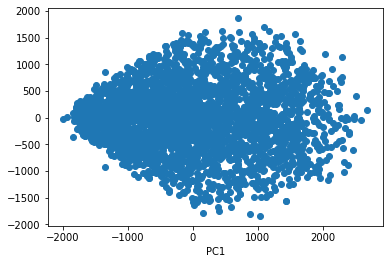

In [ ]:
from sklearn.decomposition import PCA
#reduced dimensions of training data x from 784 to 2
pca = PCA(n_components=2)
pca.fit(x)
z = pca.transform(x)
#to seperate nested pca list of 2 vectors into seperate lists to be plotted against each other in a scatter plot
xp, yp = map(list, zip(*z))
#plot scatter graph
plt.scatter(xp, yp)
plt.xlabel('PC1')
plt.ylabel('PC2')

[0.23667521 0.33412576 0.42710846 0.48039306 0.52912695 0.559835
 0.57734854 0.59388349 0.60994891 0.62543929 0.64045918 0.65488646
 0.66648414 0.67335514 0.68004848 0.68579471 0.69139975 0.69690728
 0.70220554 0.70743023 0.71248093 0.71742968 0.72224531 0.72683235
 0.73103536 0.73475131 0.73836349 0.74190045 0.74532724 0.74865423
 0.75187563 0.75505535 0.75810411 0.76107585 0.76398255 0.76683925
 0.769627   0.77238104 0.77507497 0.77763014 0.78004552 0.78226426
 0.78444723 0.78657854 0.78867747 0.79073494 0.79276611 0.7947426
 0.79669727 0.79863848 0.80054943 0.8024139  0.80426146 0.80610087
 0.8079007  0.8096486  0.81137004 0.81306926 0.81476313 0.81641163
 0.81803765 0.81961732 0.82116855 0.82268423 0.82418082 0.82566387
 0.82713384 0.82858518 0.82997156 0.83131957 0.83266037 0.83398053
 0.83525629 0.83651987 0.83776362 0.83900211 0.84020942 0.84137572
 0.84252808 0.84365988 0.84477089 0.84584475 0.84691614 0.8479711
 0.84901234 0.85003307 0.85103333 0.85202519 0.85299135 0.85393942

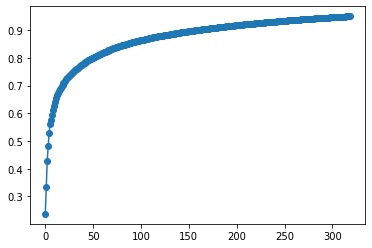

In [ ]:
#ii) 
#using pca(.95) found it to be around 300 so through trial and error i found it to be 319
pca1 = PCA(n_components=319)
pca1.fit(x)
#plot graph
plt.plot(np.cumsum(pca1.explained_variance_ratio_),'o-')
print(np.cumsum(pca1.explained_variance_ratio_))
#The number of dimensions that explain 95% of the variance is 319 dimensions

In [ ]:
#using new pca data initially preprocessed i hyperparametised the kernalised svm to ind best parameters to test the model
clf6 = GridSearchCV(SVC(max_iter=100), {'C' : [0.1, 1, 10, 100], 'kernel' : ['poly','sigmoid','rbf'], 'gamma' : [1, 0.1, 0.01]}, scoring='roc_auc', cv=5)
#created a variable (xp) of reduced and preprocessed training data
xp = pca1.fit_transform(x4)
clf6.fit(xp,y)
print(clf6.best_params_)


In [ ]:
A = []
B = []
C = []
xp = pca1.fit_transform(x4)
for i,(tr_idx, v_idx) in enumerate(skf.split(xp, y)):
    xptr, xpv = xp[tr_idx],  xp[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    clf = SVC(C=1, kernel='rbf', gamma=0.01,max_iter=100)
    clf.fit(xptr, ytr)
    Accuracy = accuracy_score(yv, clf.predict(xpv))
    roc_auc = roc_auc_score(yv, clf.decision_function(xpv))
    pr_auc = average_precision_score(yv, clf.decision_function(xpv))
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


AVG_ACC: 0.6823333333333333 AVG_PR: 0.8196528082205173 AVG_ROC: 0.7771321235191999
STD_ACC: 0.08237178589244687 STD_PR: 0.01618198727322655 STD_ROC: 0.018993210498878223


/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Within my pipeline step 1) is to apply preprocessor that will Normalise the training data
#step 2) is to then enact PCA onto the data to reduce the dimensions while keeping 95%of the variance.
#Step 3) Set up 5 stratified Kfold to split data into train and test sets across 5 different folds to train my model
#step 4) Apply steps 1 and 2 to test data to ensure data is of same dimension
#step 5) calculate the prediction scores of the test data based off my model
A1 = []
A2 = []
B1 = []
B2 = []
C1 = []
C2 = []
pca2 = PCA(n_components=389)
pca2.fit(x3)
# plt.plot(np.cumsum(pca2.explained_variance_ratio_),'o-')
# print(np.cumsum(pca2.explained_variance_ratio_))
#created a variable xr which is the training data normalised before having its dimensions reduced from 784 to 389
xr = pca2.fit_transform(x3)
#undertaking 5 stratified kfold to ensure my model of nearest neighbour can perform well consistently on unseen data
for i,(tr_idx, v_idx) in enumerate(skf.split(xr, y)):
    xrtr, xrv = xr[tr_idx],  xr[v_idx]
    ytr, yv = y[tr_idx],  y[v_idx]
    #using the classifier with the highest average ROC score with the best parameters
    kn8 = KNeighborsClassifier(n_neighbors=8)
    kn8.fit(xrtr, ytr)
    Accuracy = accuracy_score(yv, kn8.predict(xrv))
    roc_auc = roc_auc_score(yv, kn8.predict_proba(xrv)[:,1])
    pr_auc = average_precision_score(yv, kn8.predict_proba(xrv)[:,1])
    A.append(roc_auc)
    B.append(Accuracy)
    C.append(pr_auc)
print('AVG_ACC:', np.mean(B), 'AVG_PR:', np.mean(C), 'AVG_ROC:', np.mean(A))
print('STD_ACC:', np.std(B), 'STD_PR:', np.std(C), 'STD_ROC:', np.std(A))
A1.append(np.mean(A))
B1.append(np.mean(B))
C1.append(np.mean(C))
A2.append(np.std(A))
B2.append(np.std(B))
C2.append(np.std(C))

AVG_ACC: 0.7606666666666666 AVG_PR: 0.870450469032152 AVG_ROC: 0.8440284519035544
STD_ACC: 0.09798299172135266 STD_PR: 0.05268705462588123 STD_ROC: 0.0686948561818515


In [ ]:
#Table showing the best models including final model
first =['n_neighbors: 8 + PCA']
to_append = [B1, B2, A1, A2, C1, C2]
df29 = pd.DataFrame(first+to_append, columns = ['KNN (Final)'], index = ['Best_Parameters','Mean_Accuracy', 'Std_Accuracy', 'Mean_ROC', 'Std_ROC', 'Mean_PR','Std_PR'])
df30 = df29.T
df31 = pd.concat([df28, df30])
df31

,Best_Parameters,Mean_Accuracy,Std_Accuracy,Mean_ROC,Std_ROC,Mean_PR,Std_PR
Logistic Regression,"C: 10, penalty: l2, solver: saga",0.746333,0.0204776,0.800325,0.0167332,0.844857,0.0142631
Gaussian NB,var_smoothing: 1e-11,0.619667,0.0173973,0.726829,0.0122369,0.787373,0.0056642
Perceptron,penalty: l1,0.667333,0.0587424,0.739418,0.0312992,0.800067,0.027329
SVM,"C: 1, gamma: 0.01, kernel: rbf",0.752,0.0285657,0.791703,0.0170146,0.833032,0.0125098
KNN,n_neighbors: 8,0.7935,0.0468772,0.850884,0.0605442,0.875765,0.0438552
KNN (Final),n_neighbors: 8 + PCA,[0.7606666666666666],[0.09798299172135266],[0.8440284519035544],[0.0686948561818515],[0.870450469032152],[0.05268705462588123]


In [ ]:
#Test data is normalised before being transformed using pca to reduce the dimensions of test data
N = Normalizer().fit(xt)
xrt = pca2.fit_transform(N.transform(xt))
#append prediction scores into a dataframe
df7 = pd.DataFrame(kn8.predict_proba(xrt))
#drop column predicting (-1) label
df8 = df7.drop(columns=[0])
df8

,1
0,0.125
1,0.750
2,0.250
3,0.375
4,0.375
...,...
2995,1.000
2996,0.250
2997,1.000
2998,0.750


In [ ]:
#put predicted scores into csv file
df8.to_csv('u2200579.csv', header=False, index=False)